In [1]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

# Always improve figure DPI
plt.rcParams['figure.dpi'] = 120


## Load FITS Tutorial Data  
The tutorial image should be downloaded from the SEP GitHub repository and placed
in the same folder as this notebook.


In [20]:
hdu = fits.open("f150w")  # make sure the filename matches your download
data = hdu[0].data.astype(np.float64)


## Background Estimation

SEP requires background subtraction before source extraction.
We compute a background model and store a background-subtracted version of the image.


In [21]:
bkg = sep.Background(data)
data_sub = data - bkg


## Figure 1 — Original Image


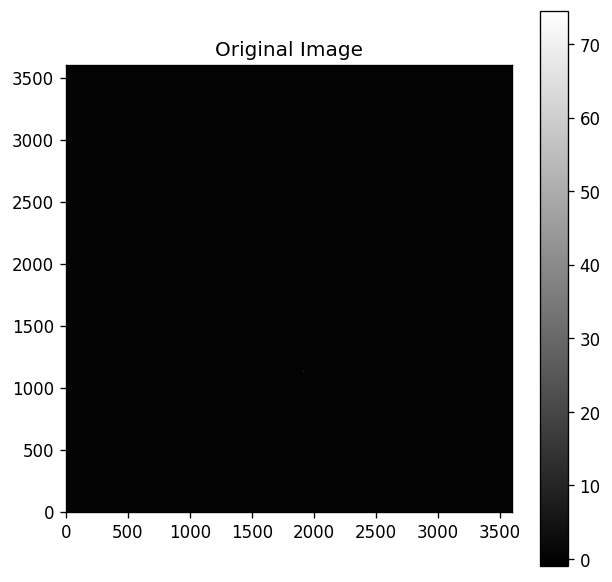

In [22]:
plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray', origin='lower')
plt.title("Original Image")
plt.colorbar()
plt.savefig("figure1_image.png")
plt.show()


## Figure 2 — Background Map


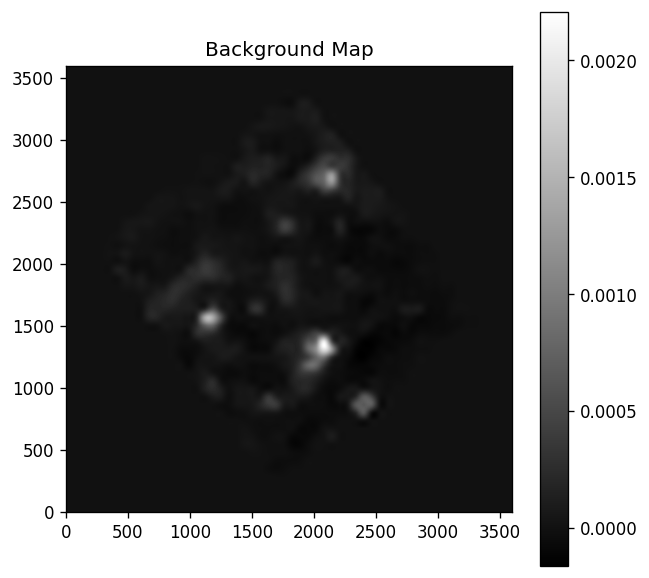

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(bkg.back(), cmap='gray', origin='lower')
plt.title("Background Map")
plt.colorbar()
plt.savefig("figure2_background.png")
plt.show()


## Extract Sources with SEP  
We use a detection threshold of 1.5σ as in the tutorial.


In [24]:
objects = sep.extract(data_sub, thresh=1.5)
len(objects)


12

## Figure 3 — Detected Sources (Ellipses)
Each detected object is drawn as an ellipse using its measured shape parameters.


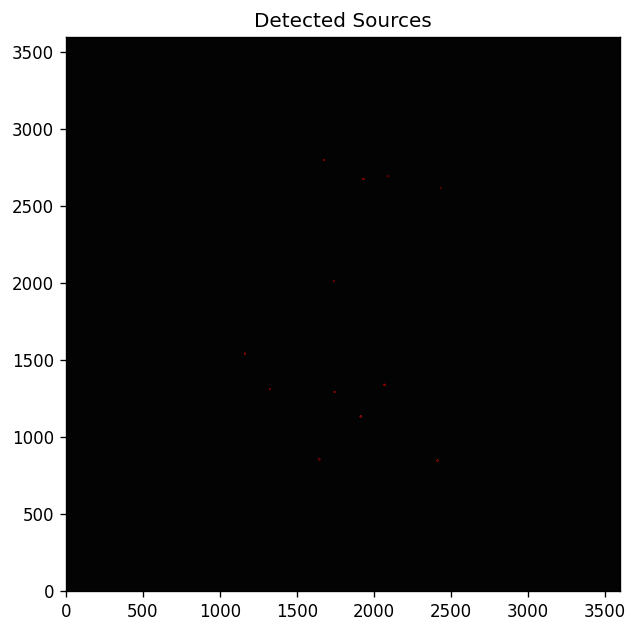

In [25]:
plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray', origin='lower')

for obj in objects:
    e = plt.Circle((obj['x'], obj['y']), obj['a'], fill=False, color='red')
    plt.gca().add_patch(e)

plt.title("Detected Sources")
plt.savefig("figure3_sources.png")
plt.show()


## Figure 4 — Flux Histogram  
We compute aperture photometry using elliptical apertures.


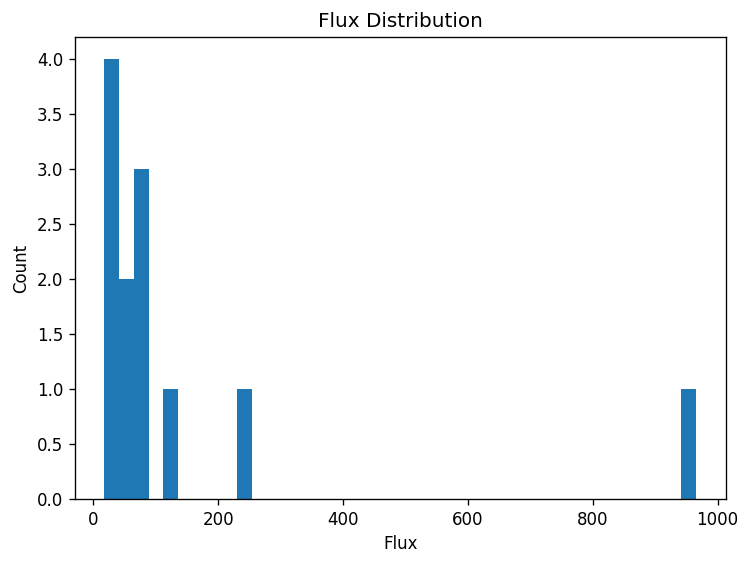

In [26]:
flux, fluxerr, flag = sep.sum_ellipse(
    data_sub,
    objects['x'], objects['y'],
    objects['a'], objects['b'],
    objects['theta'],
    2.5
)

plt.figure(figsize=(7,5))
plt.hist(flux, bins=40)
plt.xlabel("Flux")
plt.ylabel("Count")
plt.title("Flux Distribution")
plt.savefig("figure4_flux_hist.png")
plt.show()
